<img src=https://matematicas.ucm.es/themes/ucm16/media/img/logo.png>


## Machine Learning
### Práctica Final
#### Alejandro Sánchez Díaz-Casanova
#### Javier Hernández Olba
#### Eduardo Sánchez Madrid

# ÍNDICE
     1. Introducción, carga de datos, pre-processing.
     2. Análisis exploratorio.
     3. Algoritmos y métricas.
          3.1. Regresión Lineal. 
          3.2. K-NN.
          3.3. Decision Tree.
          3.4. Bagging (con Decision Tree).
          3.5. Random Forest.
          3.6. GradientBoost.
          3.7. XGBoost.
          3.8. Red Neuronal.
          
     4. Comparación por métricas.
         4.1. Comparación entre métricas.
         4.2. Orden de los modelos según MSE.
         4.3. Orden de los modelos según RMSE.
         4.4. Orden de los modelos según MAE.
         4.5. Orden de los modelos según R^2.
         4.6. Orden de los modelos según MAPE.
         
    5. Explicabilidad del modelo y ensambladores.

# ÍNDICE
     1. Introducción, carga de datos, pre-processing.
     2. Análisis exploratorio.
     3. Algoritmos y métricas.
          3.1. Regresión Lineal. 
          3.2. K-NN.
          3.3. Decision Tree.
          3.4. Bagging (con Decision Tree).
          3.5. Random Forest.
          3.6. GradientBoost.
          3.7. XGBoost.
          3.8. Red Neuronal.
          
     4. Comparación por métricas.
         4.1. Comparación entre métricas.
         4.2. Orden de los modelos según MSE.
         4.3. Orden de los modelos según RMSE.
         4.4. Orden de los modelos según MAE.
         4.5. Orden de los modelos según R^2.
         4.6. Orden de los modelos según MAPE.
         
    5. Explicabilidad del modelo y ensambladores.

# 1 INTRODUCCION, CARGA DE DATOS Y PRE PROCESSING



In [288]:
import numpy  as np  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [289]:
import warnings
warnings.filterwarnings('ignore')

Nuestra práctica se va a basar en crear un evaluador automático de precios a partir de las carácterísticas de los alojamientos. Para ello, hemos escogido un conjunto de datos extraído de Airbnb mediante técnicas de scraping.
Para reducir el tiempo de ejecución hemos usado un extracto con solo 14780 viviendas.

Procedemos a cargar los datos.

In [290]:
df = pd.read_csv("C:/Users/javio/Downloads/airbnb.csv",on_bad_lines='skip',
                 encoding= 'unicode_escape',sep=';')

En una primera visualización de los datos, podemos ver claramente varias variables que no van a tener influencia en el precio, por lo que hemos decidido descartarlas. También hemos tenido que realizar una selección de otras variables que nos proporcinaban información parecida o igual a otras, como por ejemplo, `Smart Location` que nos aporta la misma información que `City`, `Market`, `Country`, `Country Code`.

In [291]:
df.drop(['Name','ID','Zipcode','Host Response Rate','Access' ,'Listing Url', 'Scrape ID','Last Scraped','Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit','Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time','Country','City',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count','Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed','State','Market', 'Country Code', 'Latitude', 'Longitude','Weekly Price',
       'Monthly Price','Calendar Updated','Review Scores Accuracy', 'Review Scores Cleanliness','Review Scores Checkin',
        'Review Scores Communication','Review Scores Location',
         'Review Scores Value','Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90','Calendar last Scraped',
       'First Review', 'Last Review','License', 'Jurisdiction Names','Geolocation','Calculated host listings count','Features'], axis=1, inplace=True)

Una vez realizada esta primera selección, nuestros datos se han quedado con estas variables. También en esta tabla podemos ver la cantidad de 'missings' (valores faltantes) al igual que la tipología de cada variable.

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Host Total Listings Count  14777 non-null  float64
 1   Smart Location             14780 non-null  object 
 2   Property Type              14780 non-null  object 
 3   Room Type                  14780 non-null  object 
 4   Accommodates               14780 non-null  int64  
 5   Bathrooms                  14725 non-null  float64
 6   Bedrooms                   14755 non-null  float64
 7   Beds                       14731 non-null  float64
 8   Bed Type                   14780 non-null  object 
 9   Amenities                  14610 non-null  object 
 10  Square Feet                598 non-null    float64
 11  Price                      14763 non-null  float64
 12  Security Deposit           6256 non-null   float64
 13  Cleaning Fee               8687 non-null   flo

Ponemos nuestra variable objetivo `Price` en la primera columna.

In [293]:
columna_a_mover = "Price"

columnas_ordenadas = [columna_a_mover] + [col for col in df.columns if col != columna_a_mover]
df = df[columnas_ordenadas]

Procedemos a ver más claros los valores faltantes.

In [294]:
df.isnull().sum()

Price                           17
Host Total Listings Count        3
Smart Location                   0
Property Type                    0
Room Type                        0
Accommodates                     0
Bathrooms                       55
Bedrooms                        25
Beds                            49
Bed Type                         0
Amenities                      170
Square Feet                  14182
Security Deposit              8524
Cleaning Fee                  6093
Guests Included                  0
Extra People                     0
Minimum Nights                   0
Maximum Nights                   0
Availability 365                 0
Number of Reviews                0
Review Scores Rating          3304
Cancellation Policy              0
Reviews per Month             3162
dtype: int64

Vemos que `Price` tiene 17 valores nulos, así que procedemos a eliminar esas entradas ya que no nos proporcionan información para nuestro evaluador de precios.

Cabe destacar que la variable `Square Feet`, que a priori podríamos considerar de gran relevancia, tiene 14182 'missings'. Vamos a proceder a eliminarla ya que no disponemos de la información suficiente para poder hacer una imputación de todos ellos.

In [295]:
df.drop(['Square Feet'], axis=1, inplace=True)

In [296]:
df = df.dropna(subset=["Price"])
df.isnull().sum()

Price                           0
Host Total Listings Count       3
Smart Location                  0
Property Type                   0
Room Type                       0
Accommodates                    0
Bathrooms                      54
Bedrooms                       25
Beds                           48
Bed Type                        0
Amenities                     168
Security Deposit             8509
Cleaning Fee                 6085
Guests Included                 0
Extra People                    0
Minimum Nights                  0
Maximum Nights                  0
Availability 365                0
Number of Reviews               0
Review Scores Rating         3296
Cancellation Policy             0
Reviews per Month            3154
dtype: int64

Para las variables que siguen teniendo 'missings', procedemos a imputarlos dependiendo del caso.

En el caso de los baños (`Bathrooms`), las camas (`Beds`) y las habitaciones (`Bedrooms`), son casos muy similares, por lo que los valores faltantes los imputaremos por 0.

In [297]:
df["Bathrooms"] = df["Bathrooms"].fillna(0)
df["Beds"] = df["Beds"].fillna(0)
df["Bedrooms"] = df["Bedrooms"].fillna(0)

La variable `Host Total Lising Count` muestra el total de propiedades registradas en Airbnb que tiene cada arrendador, por lo que los valores faltantes los imputaremos por un 1, ya que al menos tendrán una vivienda en alquiler.

In [298]:
df["Host Total Listings Count"] = df["Host Total Listings Count"].fillna(1)

Para las variables `Cleaning Fee`, que es la tarifa obligatoria que un arrendador establece para la limpieza del alojamiento, y `Security Deposit`, que representa la fianza, volvemos a tener casos similares, donde imputaremos con un 0 suponiendo que los alojamientos con 'missings' en estas variables no contarán con dichas características.

In [299]:
df["Cleaning Fee"] = df["Cleaning Fee"].fillna(0)
df["Security Deposit"] = df["Security Deposit"].fillna(0)

Para las variables relacionadas con la valoración (`Review Scores Rating`) y la cantidad de valoraciones por mes (`Reviews per Month`), sustituiremos los valores faltantes por 50 y 0 respectivamente.

In [300]:
df["Review Scores Rating"] = df["Review Scores Rating"].fillna(50)
df["Reviews per Month"] = df["Reviews per Month"].fillna(0)

Para finalizar, tenemos la variable `Amenities`, que recoge información adicional de cada vivienda. Aquí podemos ver si un alojamiento dispone de ciertas facilidades. Entonces procedemos a desglosarla en distintas variables 'dummies' para saber si las casas disponen de televisión, conexión de WiFi, piscina, lavadora, aire acondicionado, secador de pelo, cocina, plancha, calefacción o ascensor.

In [301]:
df['Amenities']= df['Amenities'].astype(str)

df['TV'] = df['Amenities'].apply(lambda x: 1 if 'TV' in x or 'Cable Tv' in x else 0)
df['Wifi'] = df['Amenities'].apply(lambda x: 1 if 'Internet' in x or 'Wireless Internet' in x else 0)
df['Piscina'] = df['Amenities'].apply(lambda x: 1 if 'Pool' in x else 0)
df['Lavadora'] = df['Amenities'].apply(lambda x: 1 if 'Washer' in x else 0)
df['Aire acondicionado'] = df['Amenities'].apply(lambda x: 1 if 'Air conditioning' in x else 0)
df['Secador de pelo'] = df['Amenities'].apply(lambda x: 1 if 'Hair dryer' in x else 0)
df['Cocina'] = df['Amenities'].apply(lambda x: 1 if 'Kitchen' in x else 0)
df['Plancha'] = df['Amenities'].apply(lambda x: 1 if 'Iron' in x else 0)
df['Calefaccion'] = df['Amenities'].apply(lambda x: 1 if 'Heating' in x else 0)
df['Ascensor'] = df['Amenities'].apply(lambda x: 1 if 'Elevator in building' in x else 0)

Una vez creadas, eliminamos `Amenities`, ya que toda su información la tenemos en estas nuevas variables.

In [302]:
df.drop(['Amenities'], axis=1, inplace=True)

Continuamos viendo si hemos imputado todo los valores nulos.

In [303]:
df.isnull().sum()

Price                        0
Host Total Listings Count    0
Smart Location               0
Property Type                0
Room Type                    0
Accommodates                 0
Bathrooms                    0
Bedrooms                     0
Beds                         0
Bed Type                     0
Security Deposit             0
Cleaning Fee                 0
Guests Included              0
Extra People                 0
Minimum Nights               0
Maximum Nights               0
Availability 365             0
Number of Reviews            0
Review Scores Rating         0
Cancellation Policy          0
Reviews per Month            0
TV                           0
Wifi                         0
Piscina                      0
Lavadora                     0
Aire acondicionado           0
Secador de pelo              0
Cocina                       0
Plancha                      0
Calefaccion                  0
Ascensor                     0
dtype: int64

Procedemos a realizar una transformación de las variables categóricas a variables numéricas.

In [304]:
df["Room Type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [305]:
df['room_type_encoded'] = df['Room Type'].map({
    'Entire home/apt': 2,
    'Private room': 1,
    'Shared room': 0
})

In [306]:
df["Property Type"].unique()

array(['Loft', 'Apartment', 'House', 'Condominium', 'Camper/RV', 'Other',
       'Dorm', 'Bed & Breakfast', 'Tent', 'Boat', 'Guesthouse', 'Villa',
       'Hostel', 'Townhouse', 'Chalet', 'Serviced apartment', 'Bungalow',
       'Boutique hotel', 'Guest suite', 'Casa particular', 'Timeshare',
       'Earth House'], dtype=object)

In [307]:
df['property_type_encoded'] = df['Property Type'].map({
    'Loft': 0,
    'Apartment': 1,
    'House': 2,
    'Condominium': 3,
    'Camper/RV': 4,
    'Other': 5,
    'Dorm': 6,
    'Bed & Breakfast': 7,
    'Tent': 8,
    'Boat': 9,
    'Guesthouse': 10,
    'Villa': 11,
    'Hostel': 12,
    'Townhouse': 13,
    'Chalet': 14,
    'Serviced apartment': 15,
    'Bungalow': 16,
    'Boutique hotel': 17,
    'Guest suite': 18,
    'Casa particular': 19,
    'Timeshare': 20,
    'Earth House': 21
})

In [308]:
df["Bed Type"].unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Couch', 'Airbed'],
      dtype=object)

In [309]:
df['Bed_type_encoded'] = df['Bed Type'].map({
    'Real Bed': 0,
    'Pull-out Sofa': 1,
    'Futon': 2,
    'Couch': 3,
    'Airbed': 4
})

In [310]:
df["Cancellation Policy"].unique()

array(['moderate', 'super_strict_30', 'strict', 'flexible',
       'flexible_new', 'super_strict_60', 'strict_new', 'moderate_new'],
      dtype=object)

In [311]:
df['Cancellation_policy_encoded'] = df['Cancellation Policy'].map({
    'moderate': 0,
    'super_strict_30': 1,
    'strict': 2,
    'flexible': 3,
    'flexible_new': 4,
    'super_strict_60': 5,
    'strict_new': 6,
    'moderate_new': 7})

In [312]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

df['Ciudad_Codificada'] = encoder.fit_transform(df[['Smart Location']]).astype(int)

listado=pd.DataFrame({
    'Ciudad':df['Smart Location'].unique(),
    'Código de país':df['Ciudad_Codificada'].unique()
})
pd.set_option('display.max_rows',None)
print(listado)

                                         Ciudad  Código de país
0                                    Austin, TX              12
1                              Barcelona, Spain              16
2                        Amsterdam, Netherlands               4
3                            Antwerpen, Belgium               6
4                                 Paris, France             160
5                               AlcÃºdia, Spain               2
6                                 Madrid, Spain             126
7                              é©¬å¾·é, Spain             255
8        Madrid, Comunidad de Madrid, ES, Spain             124
9                                       Salerno             197
10                   Pozuelo de AlarcÃ³n, Spain             179
11                               Manacor, Spain             133
12                              Felanitx, Spain              85
13                          Portals Nous, Spain             176
14                               Andratx

Y finalizamos eliminando las variables categóricas, y solamente quedándonos con las transformadas numéricas. 

In [313]:
df = df.drop(['Smart Location','Property Type','Room Type','Bed Type','Cancellation Policy'], axis=1)

In [314]:
df.dtypes

Price                          float64
Host Total Listings Count      float64
Accommodates                     int64
Bathrooms                      float64
Bedrooms                       float64
Beds                           float64
Security Deposit               float64
Cleaning Fee                   float64
Guests Included                  int64
Extra People                     int64
Minimum Nights                   int64
Maximum Nights                   int64
Availability 365                 int64
Number of Reviews                int64
Review Scores Rating           float64
Reviews per Month              float64
TV                               int64
Wifi                             int64
Piscina                          int64
Lavadora                         int64
Aire acondicionado               int64
Secador de pelo                  int64
Cocina                           int64
Plancha                          int64
Calefaccion                      int64
Ascensor                 

A parte de las variables transformadas, vamos a añadir nuevas para completar el dataset.

In [315]:
# Una variable que indique la cantidad de baños por habitación, de una manera similar a un suavizado de Laplace en Naive Bayes.
df['Baños_por_habita'] = df['Bathrooms']/(df['Bedrooms'] + 1)

# Una variable que indique la cantidad de camas por habitación, de una manera similar a un suavizado de Laplace en Naive Bayes..
df['Camas_por_habita'] = df['Beds']/(df['Bedrooms'] + 1)

Para continuar con nuestra selección y descarte de características, realizamos un breve análisis de correlación de las variables con respecto a la variable objetivo.

<Axes: >

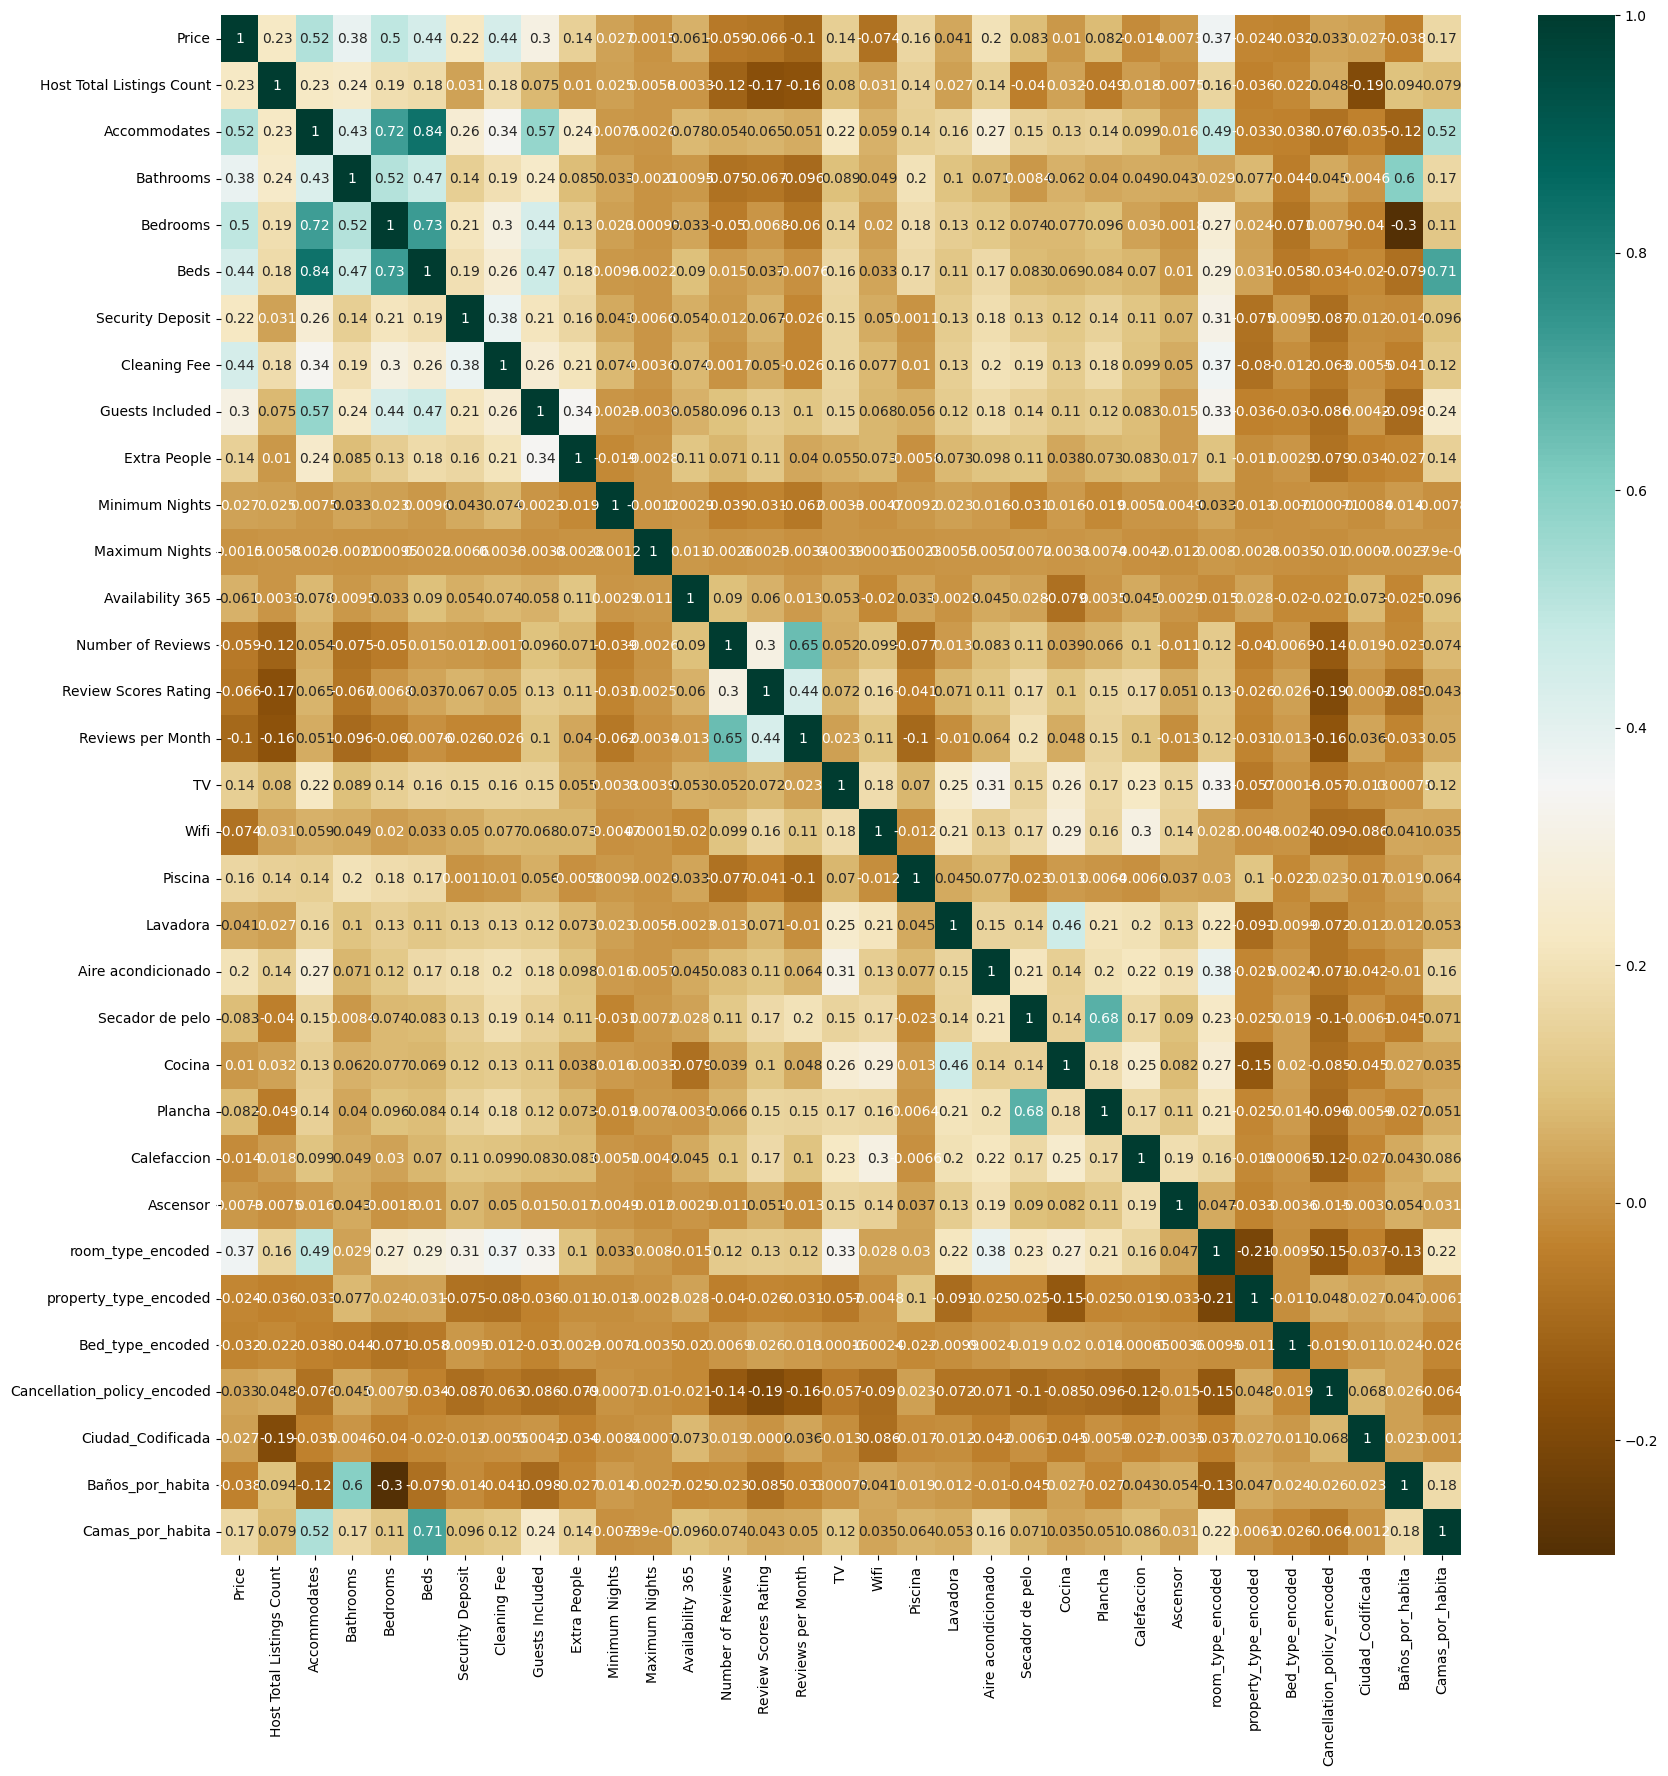

In [316]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="BrBG",annot=True)

Vemos que hay muchas variables una correlación muy baja. Realizamos otro gráfico.

<Axes: >

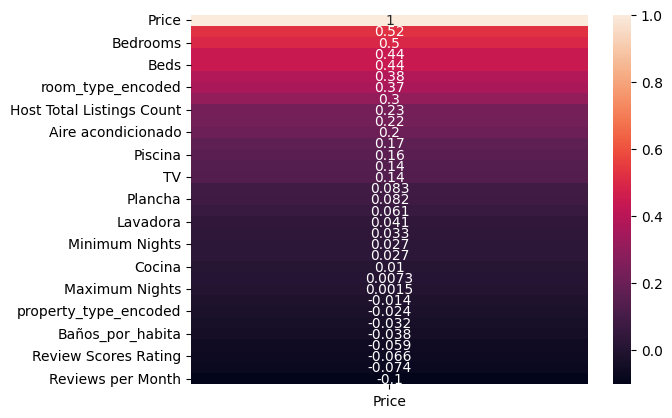

In [317]:
corre2 = df.corr()[['Price']].sort_values(by='Price',ascending=False)
sns.heatmap(corre2,annot=True)

Para tener un mejor criterio, hacemos un filtrado para ver que variables tienen mayor relevancia.

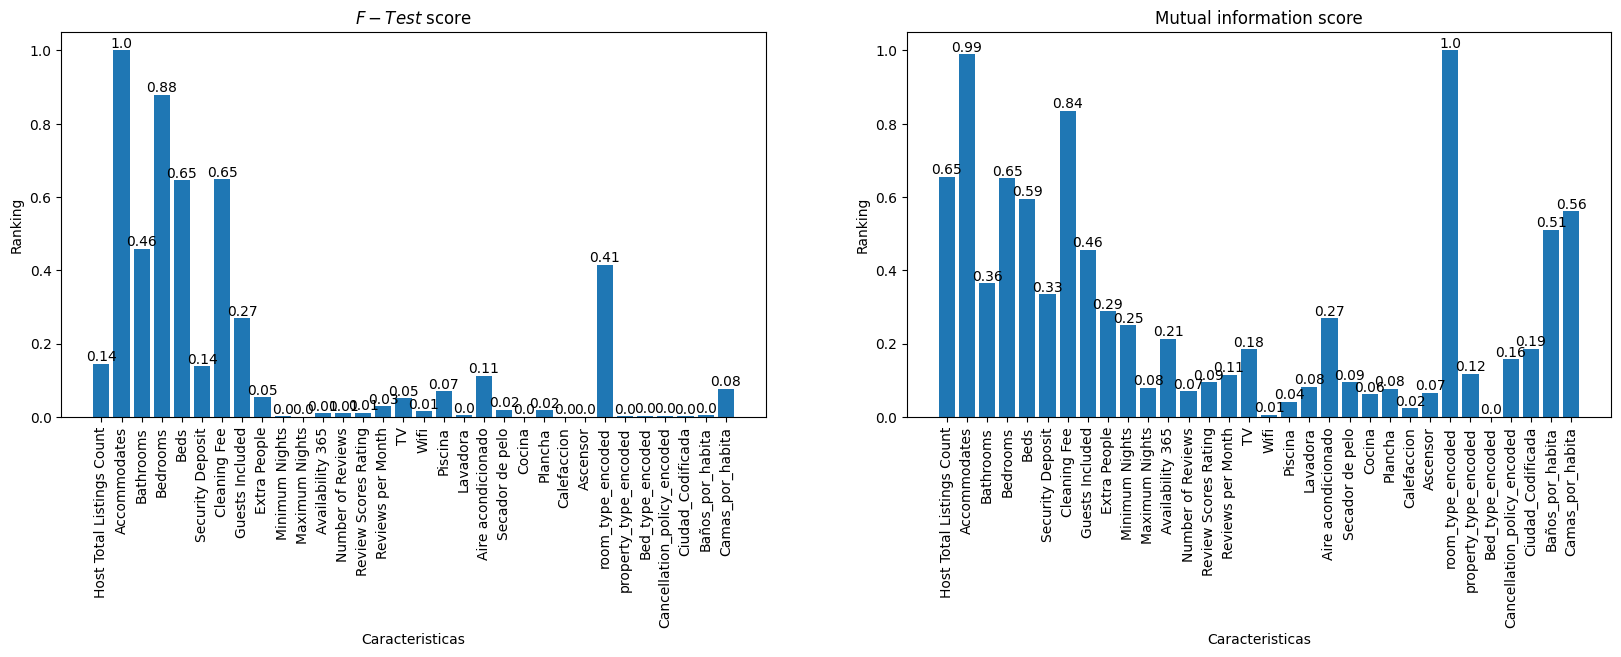

In [318]:
from sklearn.feature_selection import f_regression, mutual_info_regression
np.random.seed(2)

data = df.values 

y = data[:,0:1]    
X = data[:,1:]      

caracteristicas = df.columns[1:]


f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)


plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
for i, v in enumerate(f_test):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontsize=10)
plt.xticks(range(X.shape[1]),caracteristicas, rotation = 90)
plt.xlabel('Caracteristicas')
plt.ylabel('Ranking')
plt.title('$F-Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
for i, v in enumerate(mi):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontsize=10)
plt.xticks(range(X.shape[1]),caracteristicas, rotation = 90)
plt.xlabel('Caracteristicas')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Nos fijamos en los valores de la tabla 'Mutual Information Score', donde se ven reflejadas aquellas relaciones tanto lineales como no lineales con nuestra variable objetivo, y seleccionamos aquellas variables que tengan una puntuación mayor a 0.15.

In [319]:
variables_seleccionadas = [feature for feature, score in zip(caracteristicas,mi) if score >= 0.15]
filtro = df[variables_seleccionadas]
filtrado = pd.concat([df['Price'],filtro],axis=1)
filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14763 entries, 0 to 14779
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        14763 non-null  float64
 1   Host Total Listings Count    14763 non-null  float64
 2   Accommodates                 14763 non-null  int64  
 3   Bathrooms                    14763 non-null  float64
 4   Bedrooms                     14763 non-null  float64
 5   Beds                         14763 non-null  float64
 6   Security Deposit             14763 non-null  float64
 7   Cleaning Fee                 14763 non-null  float64
 8   Guests Included              14763 non-null  int64  
 9   Extra People                 14763 non-null  int64  
 10  Minimum Nights               14763 non-null  int64  
 11  Availability 365             14763 non-null  int64  
 12  TV                           14763 non-null  int64  
 13  Aire acondiciona

In [320]:
filtrado.describe()

,Price,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Availability 365,TV,Aire acondicionado,room_type_encoded,Cancellation_policy_encoded,Ciudad_Codificada,Baños_por_habita,Camas_por_habita
count,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.00000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000,14763.000000
mean,73.561471,12.521303,3.274334,1.275723,1.339972,2.035426,80.146515,18.576780,1.589040,7.588498,3.050667,202.09070,0.789474,0.539999,1.592833,1.764411,124.239721,0.576084,0.848679
std,72.062050,34.105126,2.092835,0.658103,0.897870,1.609535,119.797943,27.377775,1.176927,11.599172,12.273346,127.85386,0.407696,0.498414,0.519340,1.226890,26.475689,0.271183,0.507361
min,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,78.00000,1.000000,0.000000,1.000000,0.000000,126.000000,0.500000,0.500000
50%,55.000000,2.000000,3.000000,1.000000,1.000000,2.000000,0.000000,10.000000,1.000000,0.000000,2.000000,239.00000,1.000000,1.000000,2.000000,2.000000,126.000000,0.500000,0.666667
75%,86.000000,6.000000,4.000000,1.000000,2.000000,2.000000,150.000000,30.000000,2.000000,15.000000,3.000000,319.00000,1.000000,1.000000,2.000000,3.000000,126.000000,0.571429,1.000000
max,999.000000,519.000000,16.000000,8.000000,10.000000,16.000000,990.000000,500.000000,16.000000,276.000000,1125.000000,365.00000,1.000000,1.000000,2.000000,7.000000,255.000000,6.000000,8.000000


En esta descripción, nos llama la atención dos cosas.

La primera que el mínimo de `Host Total Listings Count` es 0, lo que consideramos como un valor fuera de lugar ya que esta variable indica la cantidad de viviendas publicadas por un usuario de Airbnb, lo cual como mínimo debería de ser una.

La segunda que el mínimo de `Guest Included` es 0 también, lo que volvemos a considerar como fuera de lugar ya que en cada alojamiento, con su precio base, debería incluir al menos un huésped.

Vemos en cuantos casos ocurren estas dos situaciones.

In [321]:
conteo1=filtrado['Host Total Listings Count'].value_counts()[0]
conteo1

19

In [322]:
conteo2=filtrado['Guests Included'].value_counts()[0]
conteo2

1

Como vemos, tenemos un total de 20 observaciones con estas situaciones, por lo que, como son pocas, las eliminamos.

In [323]:
filtrado = filtrado.drop(filtrado[filtrado['Host Total Listings Count'] == 0].index)
filtrado = filtrado.drop(filtrado[filtrado['Guests Included'] == 0].index)

Resumiendo, hemos preparado el dataset mediante el descarte, selección y transformación de variables, de tal forma que nos hemos quedado con las siguientes características para realizar una óptima evaluación:

| Atributo | descripción |
| :- |:- |
| *Price*| precio|
| *Host Total Listings Count*| total de viviendas de cada arrendador
| *Accommodates*| cantidad de posibles unidades alojadas
| *Bathrooms*| número de baños/aseos
| *Bedrooms*| número de habitaciones
| *Beds*| número de camas
| *Security Deposit*| fianza de cada alojamiento
| *Cleaning Fee*| tarifa de limpieza por noche
| *Guests included*| número de huéspedes incluidos en el precio inicial
| *Extra People*| número de huéspedes extra
| *Minimum Nights*| noches mínimas de alojamiento
| *Availability 365*| disponibilidad en los siguientes 365 días
| *TV*| existencia de televisión
| *Aire acondicionado*| existencia de aire acondicionado
| *room_type_encoded*| tipo de habitación (codificada)
| *Ciudad_Codificada*| ciudad del alojamiento (codificada)
| *Baños_por_habita*| cantidad de baños por habitación
| *Camas_por_habita*| cantidad de camas por habitación
| *Cancellation_policy_encoded*| tipo de política de cancelación (codificada)				


Llegados a este punto podríamos decir que hemos finalizado el preprocesamiento de datos; habiéndonos quedado con un dataset más limpio y manejable. Procedemos entonces a realizar un análisis exploratorio de los datos del dataset final.

# 2. Análisis exploratorio.

A través del empleo de gráficas y distintas tablas podremos entender mejor nuestros datos y cómo se relacionan entre sí y con la variable objetivo. También será relevante observar la distribución de las distintas variables predictoras.

In [324]:
filtrado.head()

,Price,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Availability 365,TV,Aire acondicionado,room_type_encoded,Cancellation_policy_encoded,Ciudad_Codificada,Baños_por_habita,Camas_por_habita
0,58.0,1.0,2,1.0,1.0,1.0,100.0,0.0,1,0,2,281,1,1,2,0,12,0.500000,0.500000
1,70.0,162.0,4,1.0,1.0,1.0,200.0,40.0,2,44,1,309,0,1,2,1,16,0.500000,0.500000
2,70.0,162.0,4,1.0,1.0,1.0,200.0,60.0,2,42,1,291,0,1,2,1,16,0.500000,0.500000
3,229.0,27.0,8,2.0,3.0,4.0,250.0,79.0,2,39,2,316,1,1,2,2,16,0.500000,1.000000
4,149.0,207.0,5,1.0,2.0,2.0,0.0,55.0,1,0,2,7,1,1,2,3,16,0.333333,0.666667


In [325]:
filtrado.describe()

,Price,Host Total Listings Count,Accommodates,Bathrooms,Bedrooms,Beds,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Availability 365,TV,Aire acondicionado,room_type_encoded,Cancellation_policy_encoded,Ciudad_Codificada,Baños_por_habita,Camas_por_habita
count,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000,14743.000000
mean,73.570372,12.538222,3.274910,1.275826,1.339890,2.035746,80.175270,18.590111,1.589432,7.590789,3.049515,202.005765,0.789799,0.540189,1.593095,1.764024,124.236926,0.576119,0.848864
std,72.086204,34.125156,2.092469,0.658379,0.897615,1.609861,119.819371,27.387020,1.177153,11.596247,12.279094,127.858131,0.407465,0.498399,0.519200,1.226821,26.493449,0.271255,0.507555
min,9.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,78.000000,1.000000,0.000000,1.000000,0.000000,126.000000,0.500000,0.500000
50%,55.000000,2.000000,3.000000,1.000000,1.000000,2.000000,0.000000,10.000000,1.000000,0.000000,2.000000,239.000000,1.000000,1.000000,2.000000,2.000000,126.000000,0.500000,0.666667
75%,86.000000,6.000000,4.000000,1.000000,2.000000,2.000000,150.000000,30.000000,2.000000,15.000000,3.000000,319.000000,1.000000,1.000000,2.000000,3.000000,126.000000,0.571429,1.000000
max,999.000000,519.000000,16.000000,8.000000,10.000000,16.000000,990.000000,500.000000,16.000000,276.000000,1125.000000,365.000000,1.000000,1.000000,2.000000,7.000000,255.000000,6.000000,8.000000


Comenzamos visualizando el dataframe final, con el que posteriormente entrenaremos los modelos de predicción. Al haber preprocesado los datos eficientemente no encontramos nada fuera de lo normal; quizás en 'Minimum Nights' el valor máximo de 1125, con una única observación, que decidimos no eliminar.

Podemos pasar al apartado gráfico.

In [326]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Text(0.5, 0, 'Bathrooms')

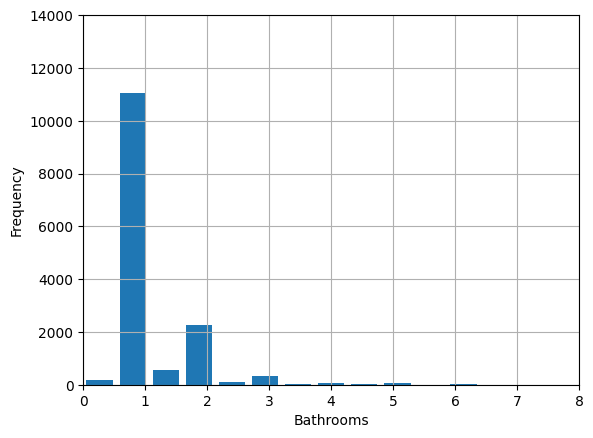

In [327]:
filtrado['Bathrooms'].plot.hist(alpha=1,rwidth=0.8, bins=15, grid = True)
plt.axis([0, 8, 0, 14000])
plt.xlabel('Bathrooms')

Text(0.5, 0, 'Bedrooms')

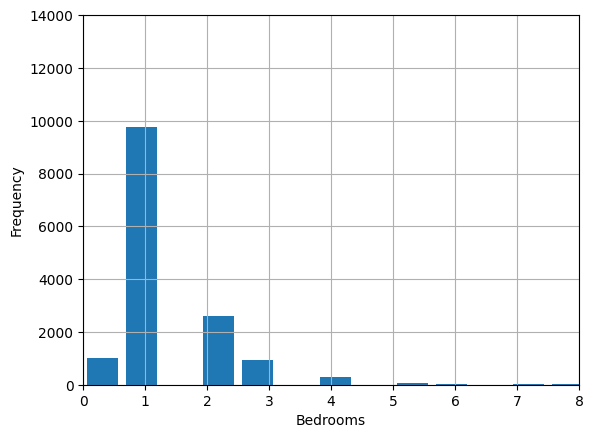

In [328]:
filtrado['Bedrooms'].plot.hist(alpha=1,rwidth=0.8, bins=16, grid = True)
plt.axis([0, 8, 0, 14000])
plt.xlabel('Bedrooms')

Text(0.5, 0, 'Security Deposit')

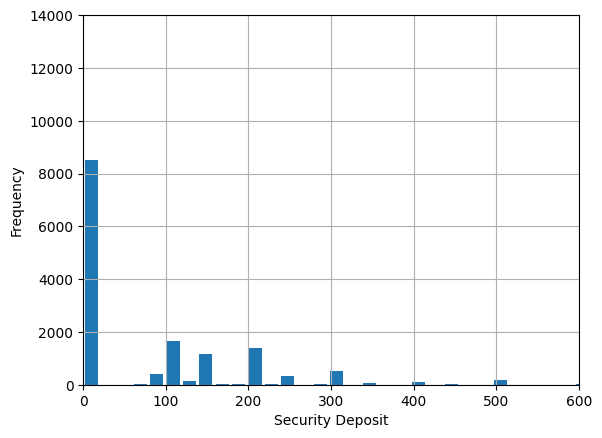

In [329]:
filtrado['Security Deposit'].plot.hist(alpha=1,rwidth=0.8, bins=50, grid = True)
plt.axis([0, 600, 0, 14000])
plt.xlabel('Security Deposit')

Text(0.5, 0, 'Extra People')

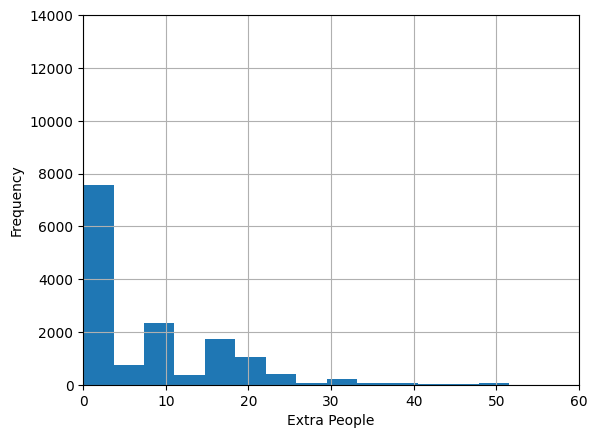

In [330]:
filtrado['Extra People'].plot.hist(alpha=1,rwidth=1, bins=75, grid = True)
plt.axis([0, 60, 0, 14000])
plt.xlabel('Extra People')

A través de estos gráficos (histogramas) podemos llegar a las mismas conclusiones que observando la tabla anterior. En los 4 casos los valores se agrupan principalmente en valores bajos de la variable, decreciendo los representantes a medida que aumenta. En muchos casos no es necesario hacer depósitos extra de dinero (fianzas) y mayoritariamente encontramos alojamientos con un sólo baño y habitación.

En el siguiente apartado haremos uso de boxplots para detectar posibles outliers; aunque decidimos no tratarlos ya que la primera intuición nos dicta que serán muy pocos casos que pueden ofrecernos información útil y enriquecer los modelos.

<Axes: xlabel='Price'>

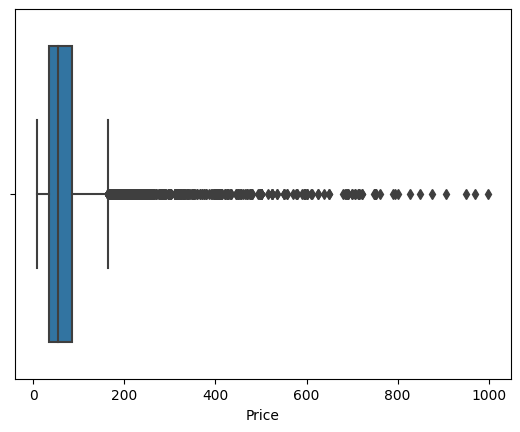

In [331]:
sns.boxplot(x=filtrado['Price'])

<Axes: xlabel='Beds'>

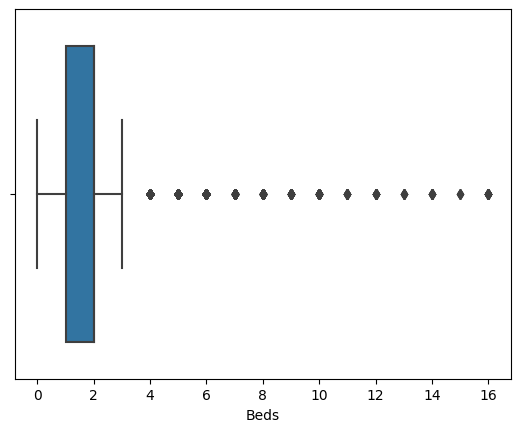

In [332]:
sns.boxplot(x=filtrado['Beds'])

<Axes: xlabel='Cleaning Fee'>

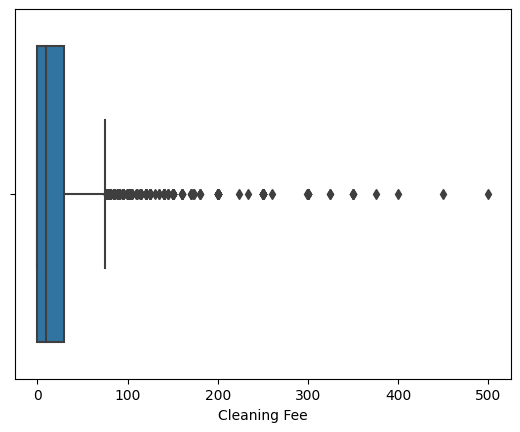

In [333]:
sns.boxplot(x=filtrado['Cleaning Fee'])

<Axes: xlabel='Extra People'>

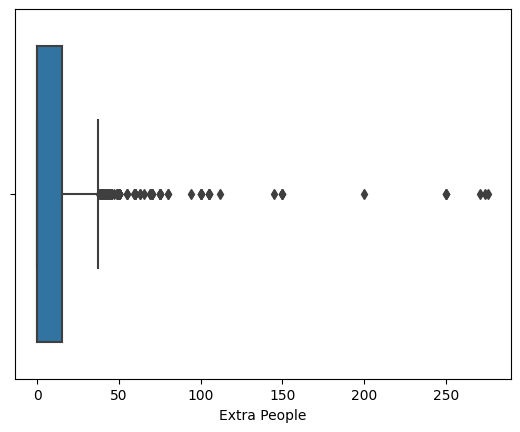

In [334]:
sns.boxplot(x=filtrado['Extra People'])

A la luz de los boxplots podemos ver que las variables cuentan con outliers que en este caso, como ya hemos mencionado, no eliminamos ni tratamos pues podrían enriquecer los modelos de predicción posteriores.

Podemos ver el porcentaje que suponen frente al total de valores de la variable.

In [335]:
filtro_outl = filtrado['Extra People'] <= 45
filtrado_outl = filtrado[filtro_outl]
print(f'El filtro elimina un total de {filtrado.shape[0]-filtrado_outl.shape[0]} registros, '
      f'el {((filtrado.shape[0]-filtrado_outl.shape[0])/filtrado.shape[0])*100}%')

El filtro elimina un total de 120 registros, el 0.813945601302313%


No llega al 1% en esta variable.

Introduzcamos en juego la variable objetivo. A través de los gráficos de dispersión podremos observar que tipo de relación presentan las variables predictoras con ella.

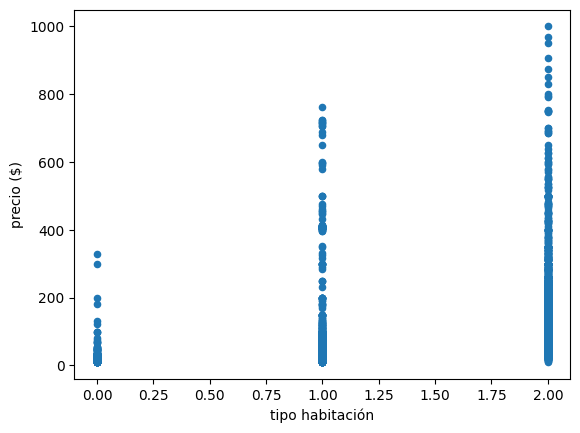

In [336]:
filtrado.plot(kind = 'scatter',x='room_type_encoded',y = 'Price')
plt.xlabel('tipo habitación')
plt.ylabel('precio ($)')
plt.show()

El tipo 2 hace referencia a que son viviendas 'enteras', más espacio y más precio.

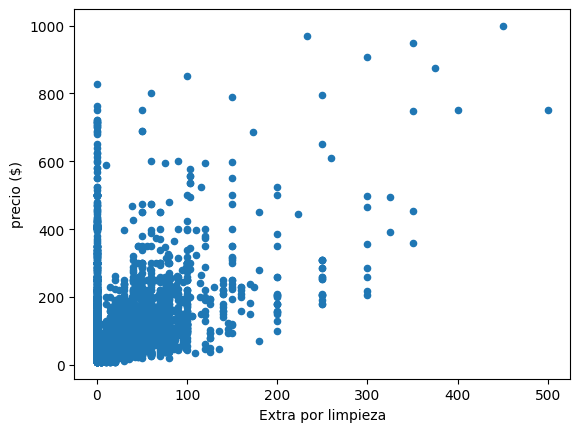

In [337]:
df.plot(kind = 'scatter',x='Cleaning Fee',y = 'Price')
plt.xlabel('Extra por limpieza')
plt.ylabel('precio ($)')
plt.show()

Vemos una clara subida de precios a más extra por limpieza; no quiere decir que en alojamientos que no cobren este extra sean baratos.

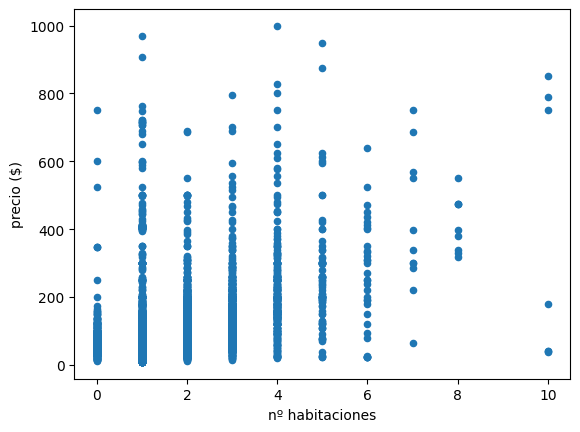

In [338]:
df.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('nº habitaciones')
plt.ylabel('precio ($)')
plt.show()

En este caso también vemos que a más habitaciones, más precio (en términos generales). Entraría en juego el tamaño en metros cuadrados de la vivienda aunque en este dataset no contamos con ella pues contaba con un gran número de datos faltantes.

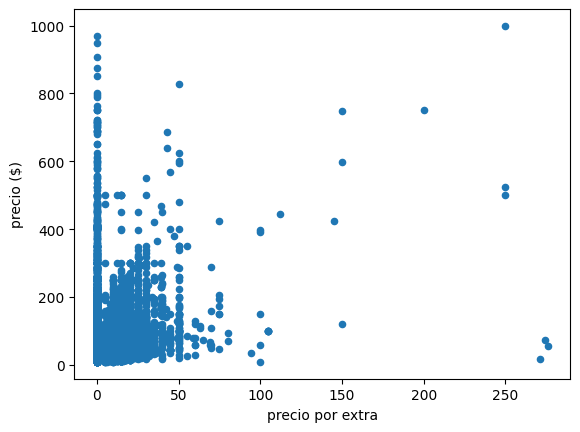

In [339]:
df.plot(kind = 'scatter',x='Extra People',y = 'Price')
plt.xlabel('precio por extra')
plt.ylabel('precio ($)')
plt.show()

Es razonable que alojamientos que cobren más por individuos extra tengan precios más altos, mencionamos las viviendas que aparecen en 0 no permiten ocupantes extra.

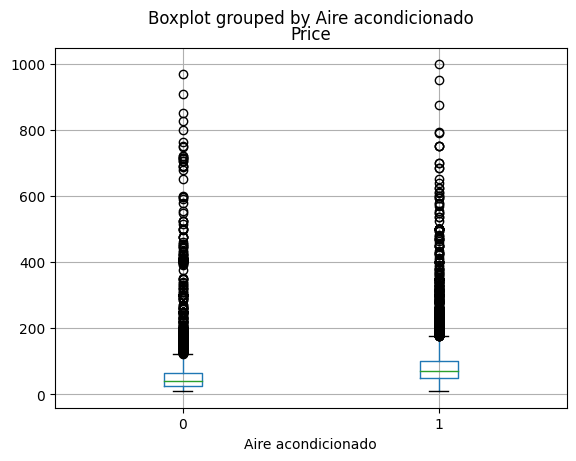

In [340]:
filtrado.boxplot(by='Aire acondicionado',column = 'Price')
plt.show()

Como nuestra variable es binario procedemos a través de un boxplot y vemos que los alojamientos con aire acondicionado presentan precios más altos.

Veamos ahora la correlación entre nuestras variables a través de la matriz de correlaciones. La correlación entre dos variables puede ser definida matemáticamente como la medida de la relación lineal entre ellas ($\rho$).

Si la correlación entre dos variables es muy grande, se dice que la matriz de atributos es singular y esto es una fuente de error importante en algunos algoritmos de machine learning. Para evitar este problema denominado 'colinealidad' eliminaremos variables con un coeficiente de correlación superior a 0'8 (suele tomarse |$\rho$| > 0.7).

Es importante tener en cuenta que la eliminación de variables puede tener un impacto significativo en el análisis y en la interpretación de los resultados.

Text(0.0, 1.0, 'Matriz de Correlaciones')

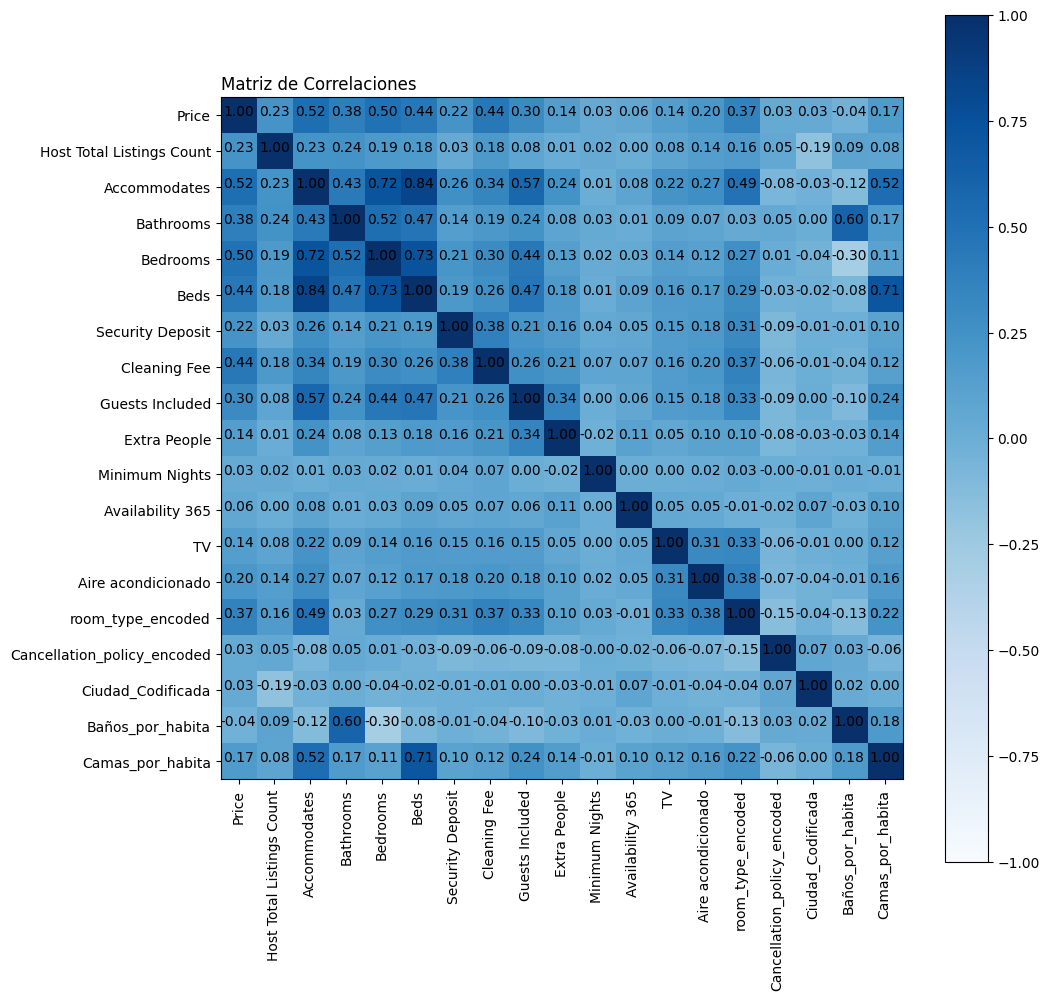

In [341]:
corr_matriz = filtrado.corr()

fig = plt.figure(figsize=(11,11))
plt.imshow(corr_matriz, cmap="Blues", vmin=-1.0,vmax=1.0)

plt.colorbar()

for i in range (19):
    for j in range (19):
        plt.text(i,j,"{:.2f}".format(corr_matriz.values[i,j]), ha="center")
        
plt.xticks(range(19), corr_matriz.index, rotation=90)
plt.yticks(range(19), corr_matriz.index)

plt.title("Matriz de Correlaciones", loc="left")

Veamos gráficamente el significado de la matriz anterior:

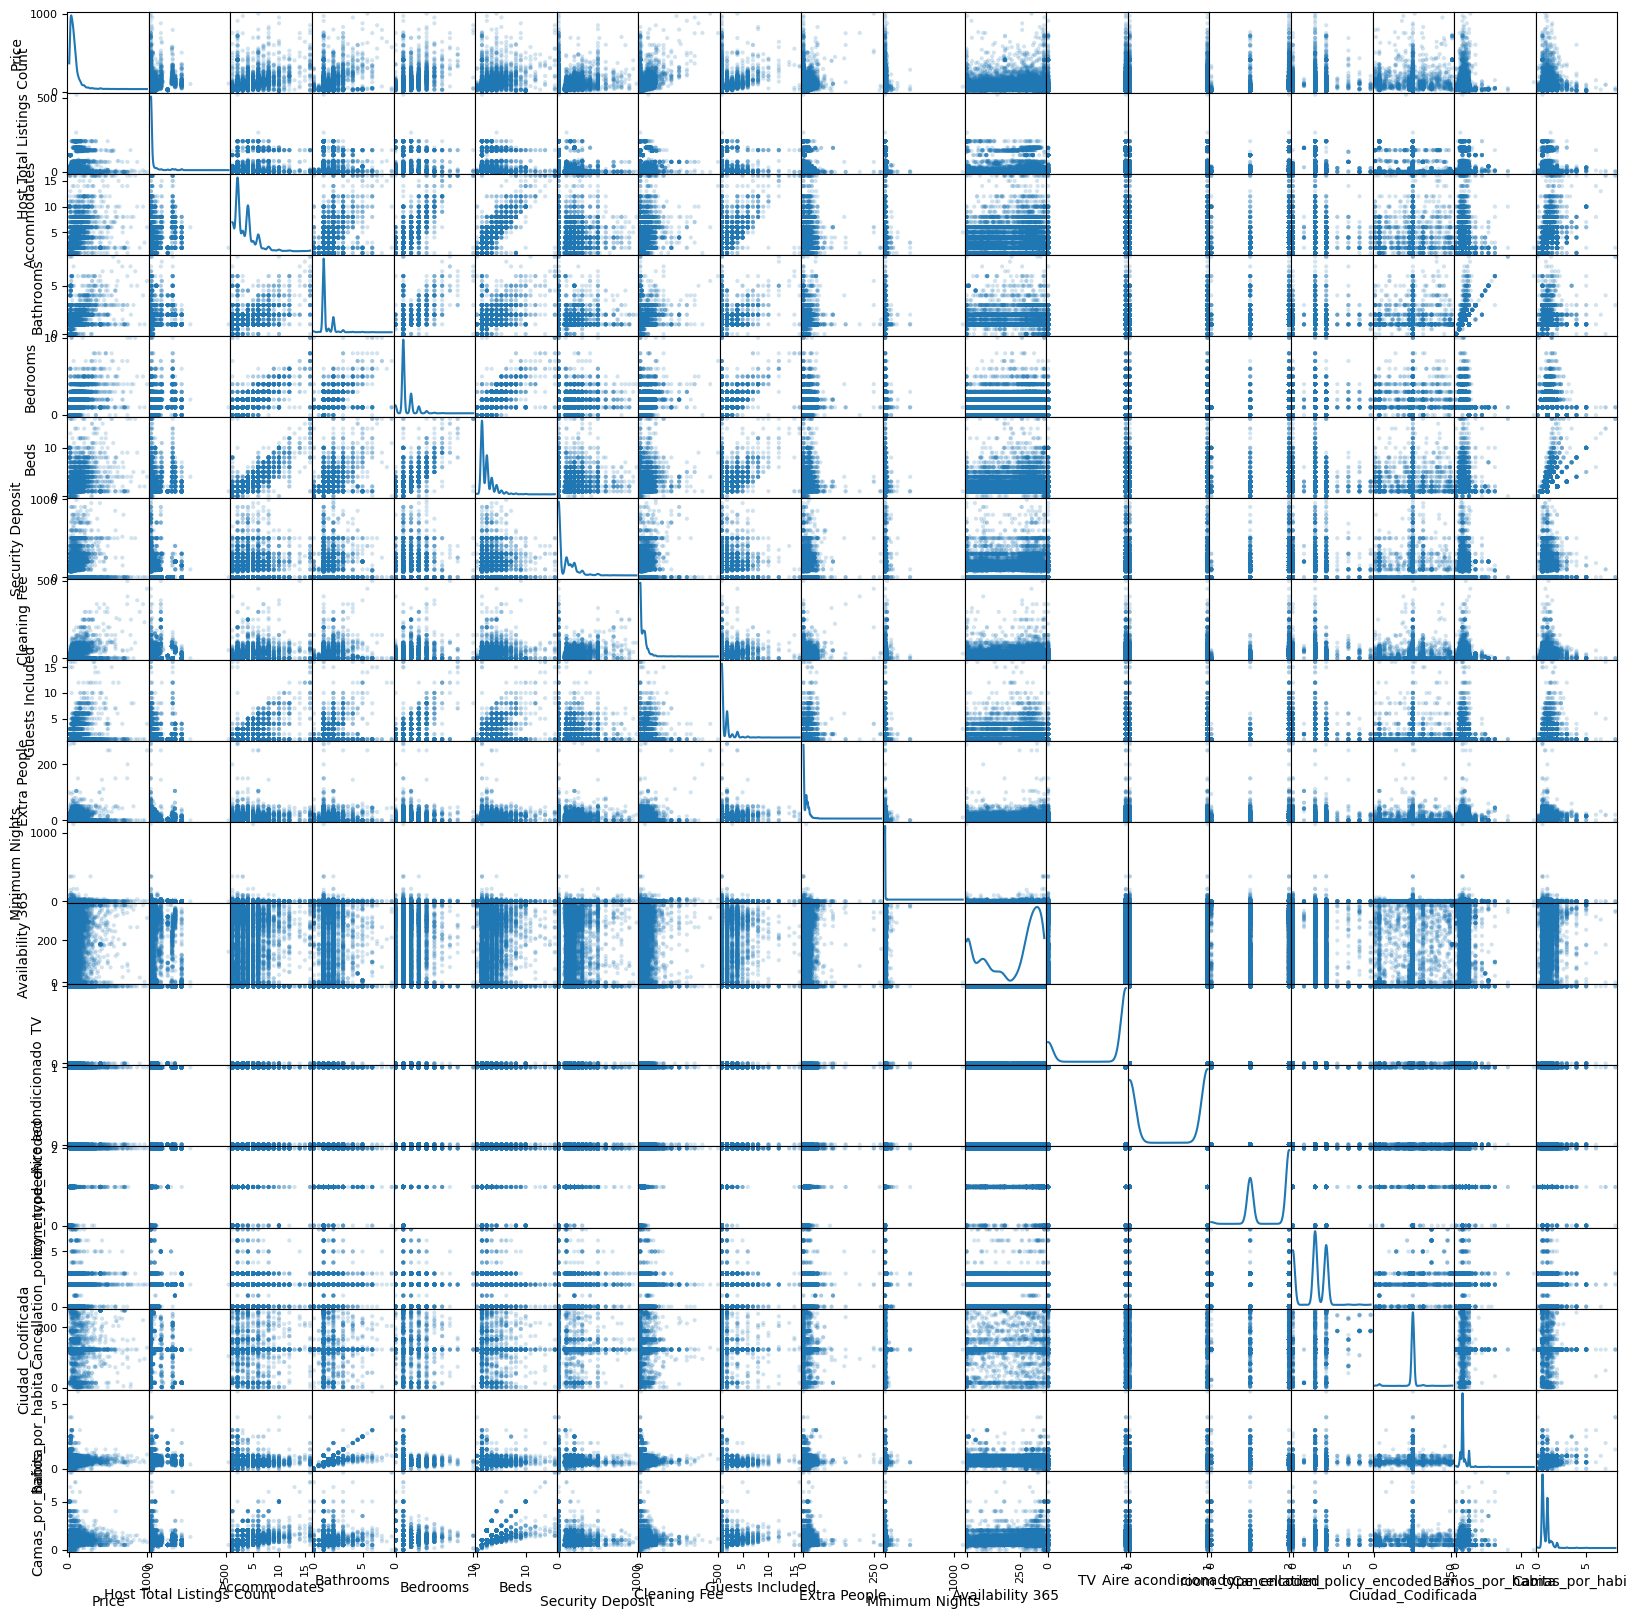

In [342]:
pd.plotting.scatter_matrix(filtrado, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

A priori podemos sentirnos abrumados por el tamaño del gráfico pero si nos fijamos con detenimiento encontramos buenas representaciones de las relaciones entre las variables.

# 3. Algoritmos y métricas.

#### En cada caso particular transformaremos o no los datos. Irá a la par del proceso de división de los datos en entrenamiento y test, ya que ciertos algoritmos no precisan de este paso.

#### Las métricas que usaremos serán el MAE, MSE, RMSE, $R^2$ y MAPE.

In [343]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## 3.1. Regresión Lineal. 

In [344]:
data = filtrado.values

y = data[:,0:1]
X = data[:,1:]      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

Datos entrenamiento:  (11794, 18)
Datos test:  (2949, 18)


In [345]:
from sklearn.linear_model import LinearRegression

valores1 = {'fit_intercept': [True, False]}

linear = LinearRegression()

lr = GridSearchCV(linear, valores1, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
lr.fit(XtrainScaled, y_train)

lr.best_estimator_

LinearRegression()

In [346]:
lr1 = lr.best_estimator_
lr2 = lr1.fit(XtrainScaled,y_train)


ytrainlr2 = lr2.predict(XtrainScaled)
ytestlr2  = lr2.predict(XtestScaled)
mseTrainModellr = mean_squared_error(y_train,ytrainlr2)
mseTestModellr = mean_squared_error(y_test,ytestlr2)
rmseTestModellr = mean_squared_error(y_test,ytestlr2,squared=False)


print ('MSE Modelo Regresion Lineal (train): %0.3g' % mseTrainModellr)
print ('MSE Modelo Regresion Lineal (test): %0.3g' % mseTestModellr)
print ('RMSE Modelo Regresion Lineal (test): %0.3g' % rmseTestModellr)
print ('MAE Modelo Regresion Lineal (test): %0.3g' % mean_absolute_error(y_test,ytestlr2))
print ('R^2 Modelo Regresion Lineal (test): %0.3g' % r2_score(y_test,ytestlr2))
print ('MAPE Modelo Regresion Lineal (test): %0.3g' % mean_absolute_percentage_error(y_test,ytestlr2))

MSE Modelo Regresion Lineal (train): 2.86e+03
MSE Modelo Regresion Lineal (test): 3.54e+03
RMSE Modelo Regresion Lineal (test): 59.5
MAE Modelo Regresion Lineal (test): 29.7
R^2 Modelo Regresion Lineal (test): 0.426
MAPE Modelo Regresion Lineal (test): 0.487


## 3.2. K-NN.

In [347]:
data = filtrado.values

y = data[:,0:1]
X = data[:,1:]      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)
XtestScaled = scaler.transform(X_test)

Datos entrenamiento:  (11794, 18)
Datos test:  (2949, 18)


In [348]:
from sklearn.neighbors import KNeighborsRegressor

ls = [1,2,3]
ks = list(range(1, 16))
knn = KNeighborsRegressor()

valores2 = {'n_neighbors':ks, 'leaf_size':ls}

cv = GridSearchCV(knn, valores2, cv=10, n_jobs=1, scoring='neg_mean_squared_error')

cv.fit(XtrainScaled, y_train)

cv.best_estimator_

KNeighborsRegressor(leaf_size=1, n_neighbors=7)

In [349]:
knr1 = cv.best_estimator_
knr2 = knr1.fit(XtrainScaled,y_train)


ytrainknr2 = knr2.predict(XtrainScaled)
ytestknr2  = knr2.predict(XtestScaled)
mseTrainModelknr2 = mean_squared_error(y_train,ytrainknr2)
mseTestModelknr2 = mean_squared_error(y_test,ytestknr2)
rmseTestModelknr2 = mean_squared_error(y_test,ytestknr2,squared=False)

print ('MSE Modelo KNN (train): %0.3g' % mseTrainModelknr2)
print ('MSE Modelo KNN (test): %0.3g' % mseTestModelknr2)
print ('RMSE Modelo KNN (test): %0.3g' % rmseTestModelknr2)
print ('MAE Modelo KNN (test): %0.3g' % mean_absolute_error(y_test,ytestknr2))
print ('R^2 Modelo KNN (test): %0.3g' % r2_score(y_test,ytestknr2))
print ('MAPE KNN (test): %0.3g' % mean_absolute_percentage_error(y_test,ytestknr2))

MSE Modelo KNN (train): 1.57e+03
MSE Modelo KNN (test): 2.5e+03
RMSE Modelo KNN (test): 50
MAE Modelo KNN (test): 23.3
R^2 Modelo KNN (test): 0.595
MAPE KNN (test): 0.346


## 3.3. Decision Tree.

In [350]:
data = filtrado.values

y = data[:,0:1]
X = data[:,1:]      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (11794, 18)
Datos test:  (2949, 18)


In [351]:
from sklearn.tree import DecisionTreeRegressor

valores3 = {'max_depth': [5,10,15,20,25,30,35,40],
              'min_samples_split': [30,35,40,45,50,55,60],
              'min_samples_leaf': list(range(1, 11))}
              

arbol1 = DecisionTreeRegressor()

ar = GridSearchCV(arbol1, valores3, cv=8, n_jobs=-1, scoring='neg_mean_squared_error')

ar.fit(X_train, y_train)

ar.best_estimator_

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=35)

In [352]:
ar1 = ar.best_estimator_
ar2 = ar1.fit(X_train,y_train)

ytrainar2 = ar2.predict(X_train)
ytestar2  = ar2.predict(X_test)
mseTrainModelar = mean_squared_error(y_train,ytrainar2)
mseTestModelar = mean_squared_error(y_test,ytestar2)
rmseTestModelar = mean_squared_error(y_test,ytestar2,squared=False)

print ('MSE Modelo Decision Tree (train): %0.3g' % mseTrainModelar)
print ('MSE Modelo Decision Tree (test): %0.3g' % mseTestModelar)
print ('RMSE Modelo Decision Tree (test): %0.3g' % rmseTestModelar)
print ('MAE Modelo Decision Tree (test): %0.3g' % mean_absolute_error(y_test,ytestar2))
print ('R^2 Modelo Decision Tree (test): %0.3g' % r2_score(y_test,ytestar2))
print ('MAPE Decision Tree (test): %0.3g' % mean_absolute_percentage_error(y_test,ytestar2))

MSE Modelo Decision Tree (train): 1.5e+03
MSE Modelo Decision Tree (test): 2.27e+03
RMSE Modelo Decision Tree (test): 47.6
MAE Modelo Decision Tree (test): 23.3
R^2 Modelo Decision Tree (test): 0.633
MAPE Decision Tree (test): 0.345


## 3.4. Bagging (con Decision Tree).

In [353]:
data = filtrado.values

y = data[:,0:1]
X = data[:,1:]      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (11794, 18)
Datos test:  (2949, 18)


In [354]:
from sklearn.ensemble import BaggingRegressor

valores4 = {'n_estimators': [150,200],
    'max_samples': [0.5,0.8,1], 'max_features' : [0,3,0.5,0,8], 'bootstrap': [True,False],'bootstrap_features':[True,False]}


bag = GridSearchCV (BaggingRegressor () , valores4 , cv = 10 ,n_jobs=-1, scoring='neg_mean_squared_error')

bag.fit(X_train, y_train)

bag.best_estimator_

BaggingRegressor(bootstrap=False, max_features=0.5, max_samples=0.8,
                 n_estimators=150)

In [355]:
bag1 = bag.best_estimator_
bag2 = bag1.fit(X_train,y_train)

ytrainbag2 = bag2.predict(X_train)
ytestbag2  = bag2.predict(X_test)
mseTrainModelbag = mean_squared_error(y_train,ytrainbag2)
mseTestModelbag = mean_squared_error(y_test,ytestbag2)
rmseTestModelbag = mean_squared_error(y_test,ytestbag2,squared=False)

print ('MSE Modelo Bagging (train): %0.3g' % mseTrainModelbag)
print ('MSE Modelo Bagging (test): %0.3g' % mseTestModelbag)
print ('RMSE Modelo Bagging (test): %0.3g' % rmseTestModelbag)
print ('MAE Modelo Bagging (test): %0.3g' % mean_absolute_error(y_test,ytestbag2))
print ('R^2 Modelo Bagging (test): %0.3g' % r2_score(y_test,ytestbag2))
print ('MAPE Bagging (test): %0.3g' % mean_absolute_percentage_error(y_test,ytestbag2))

MSE Modelo Bagging (train): 425
MSE Modelo Bagging (test): 2.14e+03
RMSE Modelo Bagging (test): 46.2
MAE Modelo Bagging (test): 21.9
R^2 Modelo Bagging (test): 0.653
MAPE Bagging (test): 0.36


## 3.5. Random Forest.

In [356]:
data = filtrado.values

y = data[:,0:1]
X = data[:,1:]      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (11794, 18)
Datos test:  (2949, 18)


In [357]:
from sklearn.ensemble import RandomForestRegressor

valores5 = {'max_depth': [10,15,20],
              'min_samples_split': [2,5,10]}

rff = RandomForestRegressor(n_estimators=200,min_samples_leaf=2)

rf = GridSearchCV(rff, valores5, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

rf.fit(X_train, y_train)

rf.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_leaf=2, n_estimators=200)

In [358]:
rf1 = rf.best_estimator_
rf2 = rf1.fit(X_train,y_train)

ytrainrf2 = rf2.predict(X_train)
ytestrf2  = rf2.predict(X_test)
mseTrainModelrf = mean_squared_error(y_train,ytrainrf2)
mseTestModelrf = mean_squared_error(y_test,ytestrf2)
rmseTestModelrf = mean_squared_error(y_test,ytestrf2,squared=False)

print ('MSE Random Forest (train): %0.3g' % mseTrainModelrf)
print ('MSE Random Forest (test): %0.3g' % mseTestModelrf)
print ('RMSE Random Forest (test): %0.3g' % rmseTestModelrf)
print ('MAE Random Forest (test): %0.3g' % mean_absolute_error(y_test,ytestrf2))
print ('R^2 Random Forest (test): %0.3g' % r2_score(y_test,ytestrf2))
print ('MAPE Random Forest (test): %0.3g' % mean_absolute_percentage_error(y_test,ytestrf2))

MSE Random Forest (train): 726
MSE Random Forest (test): 1.96e+03
RMSE Random Forest (test): 44.3
MAE Random Forest (test): 20.9
R^2 Random Forest (test): 0.682
MAPE Random Forest (test): 0.314


## 3.6. GradientBoost.

In [359]:
data = filtrado.values

y = data[:,0:1]
X = data[:,1:]      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (11794, 18)
Datos test:  (2949, 18)


In [360]:
from sklearn.ensemble import GradientBoostingRegressor

valores6 = {'learning_rate': [0.1,0.2,0.5],
          'max_depth': [4,5,7],
          'n_estimators': [200,300],
          'max_features': ['sqrt', 'log2', None]}

gradient = GradientBoostingRegressor()

gb = GridSearchCV(gradient, valores6, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

gb.fit(X_train, y_train)

gb.best_estimator_

GradientBoostingRegressor(max_depth=7, max_features='sqrt', n_estimators=200)

In [361]:
gb1 = gb.best_estimator_
gb2 = gb1.fit(X_train,y_train)

ytraingb2 = gb2.predict(X_train)
ytestgb2  = gb2.predict(X_test)
mseTrainModelgb = mean_squared_error(y_train,ytraingb2)
mseTestModelgb = mean_squared_error(y_test,ytestgb2)
rmseTestModelgb = mean_squared_error(y_test,ytestgb2,squared=False)

print ('MSE GradientBoost (train): %0.3g' % mseTrainModelgb)
print ('MSE GradientBoost (test): %0.3g' % mseTestModelgb)
print ('RMSE GradientBoost (test): %0.3g' % rmseTestModelgb)
print ('MAE GradientBoost (test): %0.3g' % mean_absolute_error(y_test,ytestgb2))
print ('R^2 GradientBoost (test): %0.3g' % r2_score(y_test,ytestgb2))
print ('MAPE GradientBoost (test): %0.3g' % mean_absolute_percentage_error(y_test,ytestgb2))

MSE GradientBoost (train): 472
MSE GradientBoost (test): 1.76e+03
RMSE GradientBoost (test): 42
MAE GradientBoost (test): 20.4
R^2 GradientBoost (test): 0.714
MAPE GradientBoost (test): 0.311


## 3.7. XGBoost.

In [362]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [363]:
from xgboost import XGBRegressor

In [364]:
data = filtrado.values

y = data[:,0:1]
X = data[:,1:]      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (11794, 18)
Datos test:  (2949, 18)


In [365]:
valores7 = {'learning_rate': [0.001,0.01,0.05],
          'max_depth': [3, 5, 7],
          'subsample': [0.5, 0.7, 1.0],
          'colsample_bytree': [0.5,1,3]}

xgbp = XGBRegressor(objective='reg:squarederror', n_estimators = 1000, min_child_weight= 1,reg_alpha= 0.0,
          reg_lambda= 1.0)

xgbb = GridSearchCV(xgbp, valores7, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

xgbb.fit(X_train, y_train)

xgbb.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [366]:
xgb = xgbb.best_estimator_
xgb2 = xgb.fit(X_train,y_train)

ytrainxgb2 = xgb2.predict(X_train)
ytestxgb2  = xgb2.predict(X_test)
mseTrainModelxgb = mean_squared_error(y_train,ytrainxgb2)
mseTestModelxgb = mean_squared_error(y_test,ytestxgb2)
rmseTestModelxgb = mean_squared_error(y_test,ytestxgb2,squared=False)

print ('MSE XGB (train): %0.3g' % mseTrainModelxgb)
print ('MSE XGB (test): %0.3g' % mseTestModelxgb)
print ('RMSE XGB (test): %0.3g' % rmseTestModelxgb)
print ('MAE XGB (test): %0.3g' % mean_absolute_error(y_test,ytestxgb2))
print ('R^2 XGB (test): %0.3g' % r2_score(y_test,ytestxgb2))
print ('MAPE XGB (test): %0.3g' % mean_absolute_percentage_error(y_test,ytestxgb2))

MSE XGB (train): 564
MSE XGB (test): 1.74e+03
RMSE XGB (test): 41.7
MAE XGB (test): 20.3
R^2 XGB (test): 0.718
MAPE XGB (test): 0.31


## 3.8. Red Neuronal.

In [367]:
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
from sklearn.preprocessing import MinMaxScaler
import multiprocessing

In [368]:
data = filtrado.values

y = data[:,0:1]
X = data[:,1:]      

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)


Datos entrenamiento:  (11794, 18)
Datos test:  (2949, 18)


In [369]:
pipe = Pipeline([('modelo', MLPRegressor(solver = 'lbfgs', max_iter= 1000))])

In [370]:
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10),(100, 100)],
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}



grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 50,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        verbose    = 0,
        random_state = 2,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('modelo',
                                              MLPRegressor(max_iter=1000,
                                                           solver='lbfgs'))]),
                   n_iter=50, n_jobs=19,
                   param_distributions={'modelo__alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                                        'modelo__hidden_layer_sizes': [10, 20,
                                                                       (10, 10),
                                                                       (100,
                                                                        100)],
                                        'modelo__learning_rate_init': [0.001,
                                                                       0.01]},
                   random_state=2, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [371]:
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)



In [372]:
mseTestModelRN = mean_squared_error(y_test,predicciones)
rmseTestModelRN = mean_squared_error(y_test,predicciones,squared=False)


print ('MSE RN (test): %0.3g' % mseTestModelRN)
print ('RMSE RN (test): %0.3g' % rmseTestModelRN)
print ('MAE RN (test): %0.3g' % mean_absolute_error(y_test,predicciones))
print ('R^2 RN (test): %0.3g' % r2_score(y_test,predicciones))
print ('MAPE RN (test): %0.3g' % mean_absolute_percentage_error(y_test,predicciones))

MSE RN (test): 2.39e+03
RMSE RN (test): 48.9
MAE RN (test): 23.8
R^2 RN (test): 0.613
MAPE RN (test): 0.375


# 4. Comparación por métricas.

## 4.1. Comparación entre métricas.

Para este punto daremos una definición de cada una de ellas.

- MSE: mide el promedio de los cuadrados de los errores , es decir, la diferencia cuadrática media entre los valores estimados y el valor real de estos. 

<img src=https://wikimedia.org/api/rest_v1/media/math/render/svg/b9df6a0778ac37b2630be0d08d8b86e586313c66>

- RMSE : raíz del MSE. Es más intuito que el MSE, pero a nivel computacional es más costoso.

- $R^2$: relación entre la suma de los cuadrados de los errores (la diferencia entre los valores observados y los valores predichos por el modelo) y la suma total de los cuadrados de la variable dependiente.

- MAE: se calcula como la media de las diferencias absolutas entre los valores predichos y los valores observados de la variable dependiente. A diferencia del MSE , el MAE no eleva al cuadrado los errores, lo que significa que los errores grandes no son penalizados proporcionalmente más que los errores pequeños.

- MAPE: mide el porcentaje promedio de error en las predicciones del modelo en relación con los valores observados de la variable dependiente.

<img src=https://cdn-images-1.medium.com/max/800/1*8DXbECB9pnKxTpIvuVD-vg.png>

<img src=https://lindevs.com/uploads/posts/content/2020/11/formula_to_calculate_mape.png>

Tanto $R^2$ y RMSE son muy parecidos al MSE. Por otro lado, el MAPE puede ser sensible a valores cercanos a cero.
Luego al valorar MSE y MAE tenemos que:

- El MSE se utiliza comúnmente en modelos de regresión debido a sus buenas propiedades matemáticas, como ser diferenciable y proporcionar un estimador insesgado de la varianza de los errores. 
- El MAE no proporciona información sobre la dirección de los errores, lo que significa que no indica si el modelo sobreestima o subestima los valores observados.

A continuación ordenaremos los métodos de mejor a peor con respecto a cada métrica.

## 4.2. Orden de los modelos según MSE.

In [373]:
val = {'Regresion':mseTestModellr,'Knn': mseTestModelknr2, 
       'DecisionTree' : mseTestModelar, 'Bagging' : mseTestModelbag,
       'RandomForest' : mseTestModelrf, 'GradientBoost' : mseTestModelgb,
       'XGBoost' : mseTestModelxgb, 'RN' :mseTestModelRN}
orden = {k: v for k, v in sorted(val.items(), key=lambda item: item[1], reverse=False)}

In [374]:
print(orden)

{'XGBoost': 1741.8033639229025, 'GradientBoost': 1764.5233473485855, 'RandomForest': 1958.3669614479668, 'Bagging': 2137.731608642799, 'DecisionTree': 2265.7698202179204, 'RN': 2388.4045414092443, 'Knn': 2498.2984962041787, 'Regresion': 3537.2800500887547}


## 4.3. Orden de los modelos según RMSE.

In [375]:
val = {'Regresion':rmseTestModellr,'Knn': rmseTestModelknr2, 
       'DecisionTree' : rmseTestModelar, 'Bagging' : rmseTestModelbag,
       'RandomForest' : rmseTestModelrf, 'GradientBoost' : rmseTestModelgb,
       'XGBoost' : rmseTestModelxgb, 'RN' :rmseTestModelRN}
orden = {k: v for k, v in sorted(val.items(), key=lambda item: item[1], reverse=False)}

In [376]:
print(orden)

{'XGBoost': 41.7349178017988, 'GradientBoost': 42.006229863540305, 'RandomForest': 44.25344010862847, 'Bagging': 46.235609746631425, 'DecisionTree': 47.600103153437814, 'RN': 48.871305910618396, 'Knn': 49.98298206594099, 'Regresion': 59.47503720123893}


## 4.4. Orden de los modelos según MAE.

In [377]:
val = {'Regresion':mean_absolute_error(y_test,ytestlr2),'Knn': mean_absolute_error(y_test,ytestknr2), 
       'DecisionTree' : mean_absolute_error(y_test,ytestar2), 'Bagging' : mean_absolute_error(y_test,ytestbag2),
       'RandomForest' : mean_absolute_error(y_test,ytestrf2), 'GradientBoost' : mean_absolute_error(y_test,ytestgb2),
       'XGBoost' : mean_absolute_error(y_test,ytestxgb2), 'RN' :mean_absolute_error(y_test,predicciones)}
orden = {k: v for k, v in sorted(val.items(), key=lambda item: item[1], reverse=False)}

In [378]:
print(orden)

{'XGBoost': 20.34432636272628, 'GradientBoost': 20.38676921391315, 'RandomForest': 20.866108522044282, 'Bagging': 21.858172265423377, 'DecisionTree': 23.327639288568953, 'Knn': 23.349174054158794, 'RN': 23.8320238098804, 'Regresion': 29.704629797890803}


## 4.5. Orden de los modelos según $R^2$.

In [379]:
val = {'Regresion':r2_score(y_test,ytestlr2),'Knn': r2_score(y_test,ytestknr2), 
       'DecisionTree' : r2_score(y_test,ytestar2), 'Bagging' : r2_score(y_test,ytestbag2),
       'RandomForest' : r2_score(y_test,ytestrf2), 'GradientBoost' : r2_score(y_test,ytestgb2),
       'XGBoost' : r2_score(y_test,ytestxgb2), 'RN' :r2_score(y_test,predicciones)}
orden = {k: v for k, v in sorted(val.items(), key=lambda item: item[1], reverse=True)}

In [380]:
print(orden)

{'XGBoost': 0.7175319496896089, 'GradientBoost': 0.7138474526021288, 'RandomForest': 0.6824118560968762, 'Bagging': 0.6533243119818919, 'DecisionTree': 0.6325603700020126, 'RN': 0.6126727114334503, 'Knn': 0.5948512214795492, 'Regresion': 0.4263597029115398}


## 4.6. Orden de los modelos según MAPE.

In [381]:
val = {'Regresion':mean_absolute_percentage_error(y_test,ytestlr2),'Knn': mean_absolute_percentage_error(y_test,ytestknr2), 
       'DecisionTree' : mean_absolute_percentage_error(y_test,ytestar2), 
       'Bagging' : mean_absolute_percentage_error(y_test,ytestbag2),
       'RandomForest' : mean_absolute_percentage_error(y_test,ytestrf2), 
       'GradientBoost' : mean_absolute_percentage_error(y_test,ytestgb2),
       'XGBoost' : mean_absolute_percentage_error(y_test,ytestxgb2), 'RN' :mean_absolute_percentage_error(y_test,predicciones)}
orden = {k: v for k, v in sorted(val.items(), key=lambda item: item[1], reverse=False)}

In [382]:
print(orden)

{'XGBoost': 0.30985761658636357, 'GradientBoost': 0.3107387440244937, 'RandomForest': 0.31385452712658235, 'DecisionTree': 0.3445534940691914, 'Knn': 0.346305944654045, 'Bagging': 0.36000351377596923, 'RN': 0.3753671671924046, 'Regresion': 0.4866290316943948}


# 5. Explicabilidad del modelo y ensambladores.

room_type_encoded: 0.2575972080230713
Bathrooms: 0.15022557973861694
Bedrooms: 0.1261431723833084
Ciudad_Codificada: 0.08896762877702713
Cleaning Fee: 0.0710010901093483
Accommodates: 0.05883549898862839
Extra People: 0.031800903379917145
Guests Included: 0.02647213637828827
TV: 0.025504877790808678
Baños_por_habita: 0.025356946513056755
Aire acondicionado: 0.02205202355980873
Host Total Listings Count: 0.021818337962031364
Beds: 0.018746955320239067
Availability 365: 0.01815280131995678
Camas_por_habita: 0.015801992267370224
Cancellation_policy_encoded: 0.014761597849428654
Minimum Nights: 0.014301685616374016
Security Deposit: 0.012459507212042809


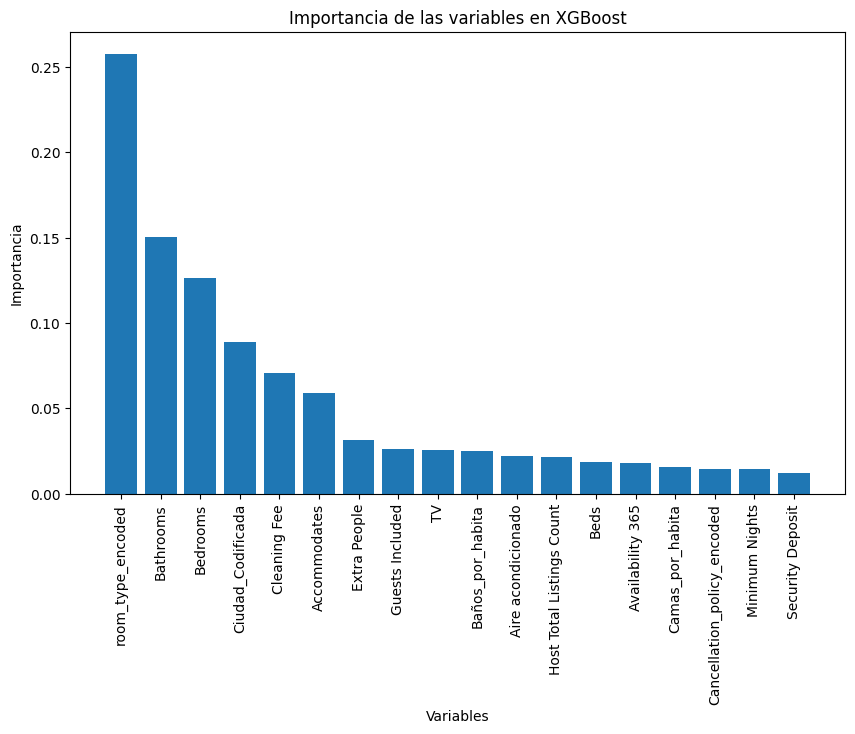

In [383]:
importances1 = xgbb.best_estimator_.feature_importances_

feature_importances1 = list(zip(filtrado.columns[1:], importances1))
feature_importances1 = sorted(feature_importances1, key=lambda x: x[1], reverse=True)

for feature, importance in feature_importances1:
    print(f"{feature}: {importance}")

   
importances1 = feature_importances1
features = [x[0] for x in importances1]
scores = [x[1] for x in importances1]


plt.figure(figsize=(10, 6))
plt.bar(features, scores)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las variables en XGBoost')
plt.show()

Ciudad_Codificada: 0.17169123495355634
Accommodates: 0.1310783546326814
Cleaning Fee: 0.11646164533452098
Bathrooms: 0.08528525712154962
room_type_encoded: 0.08299039203106949
Bedrooms: 0.08011948521207306
Extra People: 0.05502625007813182
Availability 365: 0.05105862511938529
Beds: 0.04006175932519525
Host Total Listings Count: 0.03862795554839457
Baños_por_habita: 0.030178574770554984
Guests Included: 0.026411793774081857
Minimum Nights: 0.0209036202486548
Security Deposit: 0.020494090245885905
Camas_por_habita: 0.01859966661397615
Aire acondicionado: 0.012872268035504082
Cancellation_policy_encoded: 0.010883934107296914
TV: 0.007255092847487424


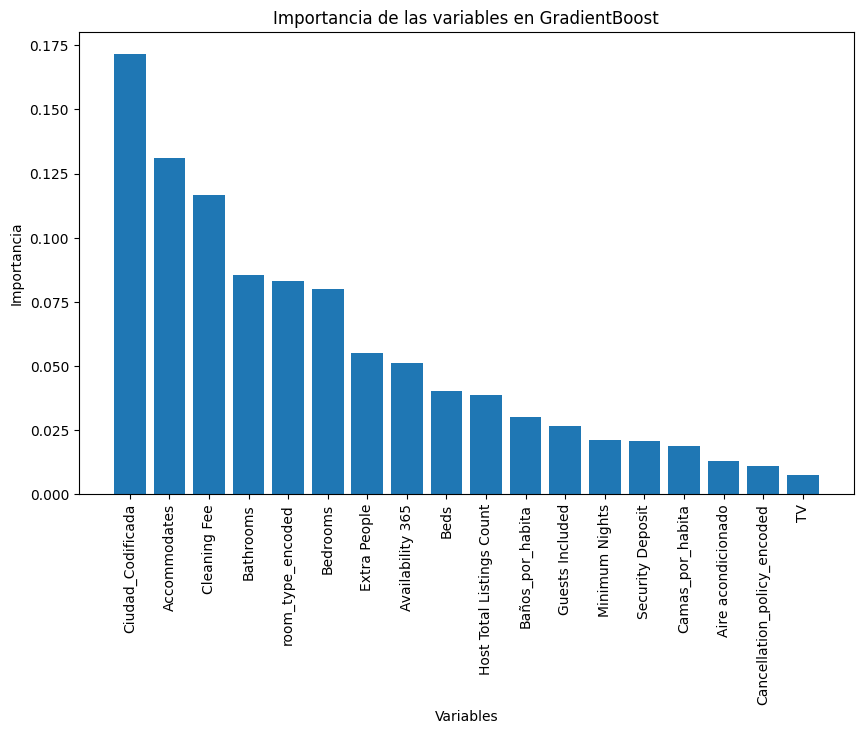

In [426]:
importances2 = gb.best_estimator_.feature_importances_

feature_importances2 = list(zip(filtrado.columns[1:], importances2))
feature_importances2 = sorted(feature_importances2, key=lambda x: x[1], reverse=True)

for feature, importance in feature_importances2:
    print(f"{feature}: {importance}")

    
importances2 = feature_importances2
features = [x[0] for x in importances2]
scores = [x[1] for x in importances2]


plt.figure(figsize=(10, 6))
plt.bar(features, scores)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las variables en GradientBoost')
plt.show()

Bedrooms: 0.21121330968287635
Ciudad_Codificada: 0.17119979580774883
Bathrooms: 0.16725161554465776
Cleaning Fee: 0.1060227202370115
room_type_encoded: 0.08182770358310285
Availability 365: 0.06190103181272816
Accommodates: 0.038290708875554684
Extra People: 0.0304322283755844
Host Total Listings Count: 0.02737931696810475
Minimum Nights: 0.02174090983761832
Baños_por_habita: 0.015018659091572408
Security Deposit: 0.01494915323363183
Camas_por_habita: 0.012429697629737925
Guests Included: 0.010107788777534345
Beds: 0.010085355197888363
Cancellation_policy_encoded: 0.009760873089706044
Aire acondicionado: 0.006253757811101253
TV: 0.004135374443840096


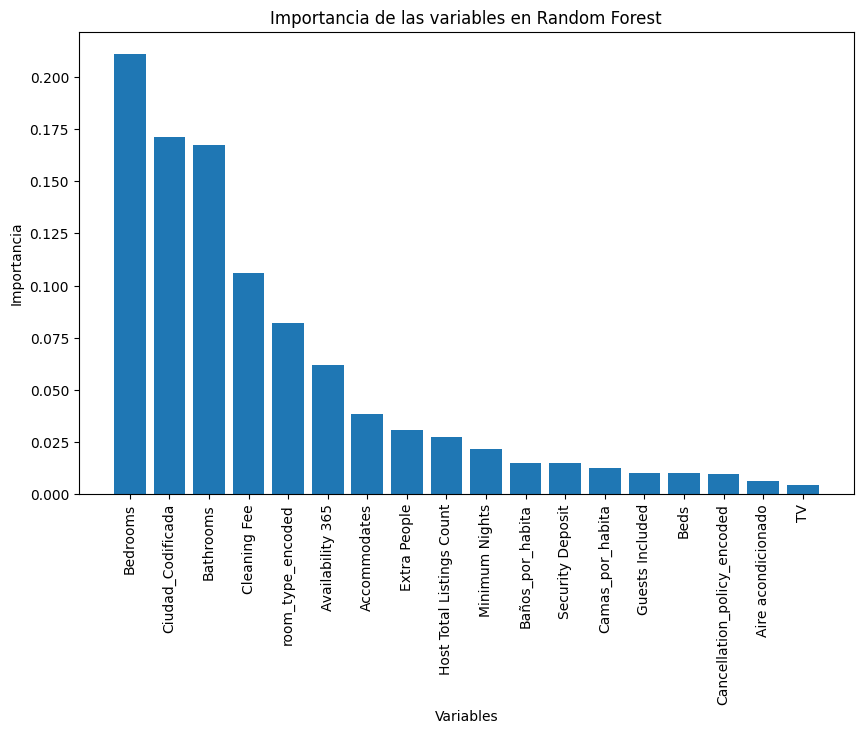

In [425]:
importances3 = rf.best_estimator_.feature_importances_

feature_importances3 = list(zip(filtrado.columns[1:], importances3))
feature_importances3 = sorted(feature_importances3, key=lambda x: x[1], reverse=True)

for feature, importance in feature_importances3:
    print(f"{feature}: {importance}")

    import matplotlib.pyplot as plt


importances3 = feature_importances3
features = [x[0] for x in importances3]
scores = [x[1] for x in importances3]


plt.figure(figsize=(10, 6))
plt.bar(features, scores)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.title('Importancia de las variables en Random Forest')
plt.show()

Vemos que los modelos que mejores resultados arrojan coinciden en la importancia de variables como el nº de camas y habitaciones o el tipo de alojamiento (coincide con lo que se podría pensar a priori que valoriza más este tipo de producto). Al habernos encontrado con un dataset que presentaba un gran numero de variables es importante una buena elección de estas a la hora de entrenar nuestros modelos. 

Los resultados de las métricas usadas podrían ser afinados creando nuevas variables o añadiendo variables que no aparecían originalmente; así como intentar enriquecer las observaciones minimizando los datos faltantes, que representaban un número elevado de estas.

Volviendo a los modelos óptimos, fijándonos en XGBoost, observamos que da elevada importancia a la ciudad en la que nos encontremos ya que podría indicarnos que los precios varían en función de esta. En el top 3 de variables más importantes, aún así, estarían el tipo de alojamiento y el nº de camas y habitaciones. Es fácilmente interpretable e incluso concuerda con la intuición propia, en términos generales, de un individuo que realice una investigación de este tipo.

# ---------------------------------------------------------------------------------------------------------------